### High Level Steps

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome

2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.

3. Data Cleaning – imputing missing values in the data and checking for outliers

4. Feature Engineering – modifying existing variables and creating new ones for analysis

5. Model Building – making predictive models on the data

### 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available. Read more about hypothesis generation here.

**The Problem Statement**

Understanding the problem statement is the first and foremost step. You can view this in the competition page but I’ll iterate the same here:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

So the idea is to find out the properties of a product, and store which impacts the sales of a product. Let’s think about some of the analysis that can be done and come up with certain hypothesis.

**The Hypotheses**

I came up with the following hypothesis while thinking about the problem. These are just my thoughts and you can come-up with many more of these. Since we’re talking about stores and products, lets make different sets for each.

** Store Level Hypotheses: **

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.

3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place

4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.

5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.

7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.

8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

** Product Level Hypotheses: **

1. Brand: Branded products should have higher sales because of higher trust in the customer.

2. Packaging: Products with good packaging can attract customers and sell more.

3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.

4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.

5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

6. Advertising: Better advertising of products in the store will should higher sales in most cases.

7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

These are just some basic 15 hypothesis I have made, but you can think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these gives us a better understanding of the problem and we can even look for open source information if available.

Lets move on to the data exploration where we will have a look at the data in detail.

### 2. Data Exploration

In [1]:
# Read libraries

import pandas as pd
import numpy as np

In [9]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [10]:
# Its generally a good idea to combine both train and test data sets into one, 
# perform feature engineering and then divide them later again. 
# This saves the trouble of performing the same steps twice on test and train. 
# Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

# Thus we can see that data has same columns but rows equivalent to both test and train.
data

(8523, 13) (5681, 12) (14204, 13)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [11]:
# One of the key challenges in any data set is missing values. 
# Lets start by checking which columns contain missing values

data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [12]:
# Note that the Item_Outlet_Sales is the target variable and
# missing values are ones in the test set. So we need 
# not worry about it. But we’ll impute the missing values 
# in Item_Weight and Outlet_Size in the data cleaning section.

# Lets look at some basic statistics for numerical variables.

data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [13]:
# Some observations:

# 1. Item_Visibility has a min value of zero. 
# This makes no practical sense because when a 
# product is being sold in a store, the visibility cannot be 0.
# 2. Outlet_Establishment_Years vary from 1985 to 2009.
# The values might not be apt in this form. Rather, 
# if we can convert them to how old the particular store is,
# it should have a better impact on sales.
# 3. The lower ‘count’ of Item_Weight and Item_Outlet_Sales 
# confirms the findings from the missing value check.

In [14]:
# Moving to nominal (categorical) variable, lets have a 
# look at the number of unique values in each of them.

data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [ ]:
# This tells us that there are 1559 products and 
# 10 outlets/stores (which was also mentioned in 
# problem statement). Another thing that should 
# catch attention is that Item_Type has 16 unique values.
# Let’s explore further using the frequency of different 
# categories in each nominal variable. I’ll exclude the ID 
# and source variables for obvious reasons.

In [16]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

categorical_columns

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source']

In [18]:
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

categorical_columns


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [27]:
#Print frequency of categories
for col in categorical_columns:
    print ("Frequency of Categories for varible %s %col")
    print (data[col].value_counts())
    print("")

Frequency of Categories for varible %s %col
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible %s %col
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible %s %col
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible %s %col
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for va

In [ ]:
# The output gives us following observations:

# 1. Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
# 2. Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
# 3. Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

### 3. Data Cleaning 

This step typically involves imputing missing values and treating outliers. Though outlier removal is very important in regression techniques, advanced tree based algorithms are impervious to outliers. So I’ll leave it to you to try it out. We’ll focus on the imputation step here, which is a very important step.

Note: We’ll be using some Pandas library extensively here. If you’re new to Pandas, please go through this article.

** Imputing Missing Values **

We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item. This can be done as:

In [82]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#list(item_avg_weight.columns)

item_avg_weight.loc['DRA12']
#item_avg_weight[item_avg_weight['Item_Identifier'] == 'DRA12']
#item_avg_weight

# item_avg_weight.query('Item_Identifier == ["DRA12"]')



Item_Weight    11.6
Name: DRA12, dtype: float64

In [53]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#miss_bool

In [32]:
#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))

Orignal #missing: 2439


In [84]:
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])

In [85]:
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Final #missing: 0


This confirms that the column has no missing values now. Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [86]:
#Import mode function:
from scipy.stats import mode

In [88]:
#Determing the mode for each
outlet_size_mode = data.dropna(subset=['Outlet_Size']).pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]), dropna=True)

#data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [104]:
print ('Mode for each Outlet_Type:')
print("")
outlet_size_mode

Mode for each Outlet_Type:



Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [92]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

In [103]:
#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d' % sum(miss_bool))

Orignal #missing: 4016


In [98]:
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [100]:
print (sum(data['Outlet_Size'].isnull()))

0


### 4. Feature Engineering 

We explored some nuances in the data in the data exploration section. Lets move on to resolving them and making our data ready for analysis. We will also create some new variables using the existing ones in this section.

** Step 1: Consider combining Outlet_Type **

During exploration, we decided to consider combining the Supermarket Type2 and Type3 variables. But is that a good idea? A quick way to check that could be to analyze the mean sales by type of store. If they have similar sales, then keeping them separate won’t help much.

In [105]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


This shows significant difference between them and we’ll leave them as it is. Note that this is just one way of doing this, you can perform some other analysis in different situations and also do the same for other features.

**Step 2: Modify Item_Visibility**

We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that produc

In [106]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [108]:
#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

In [109]:
print ('Number of 0 values initially: %d'%sum(miss_bool))

Number of 0 values initially: 879


In [111]:
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

In [112]:
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values after modification: 0


So we can see that there are no values which are zero.

In step 1 we hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘visibility_avg’ variable made above to achieve this.

In [114]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)

In [116]:
print (data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


Thus the new variable has been successfully created. Again, this is just 1 example of how to create new features. I highly  encourage you to try more of these, as good features can drastically improve model performance and they invariably prove to be the difference between the best and the average model.

**Step 3: Create a broad category of Type of Item**

Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [117]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [118]:
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [119]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Another idea could be to combine categories based on sales. The ones with high average sales could be combined together. I leave this for you to try.

**Step 4: Determine the years of operation of a store**

We wanted to make a new column depicting the years of operation of a store. This can be done as:

In [120]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

This shows stores which are 4-28 years old. Notice I’ve used 2013. Why? Read the problem statement carefully and you’ll know.

**Step 5: Modify categories of Item_Fat_Content**

We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

In [122]:
#Change categories of low fat:
print ('Original Categories:')
print ("")
print (data['Item_Fat_Content'].value_counts())

Original Categories:

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [123]:
print ("Modified Categories:")
print("")

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Modified Categories:

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Now it makes more sense. But hang on, in step 4 we saw there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [124]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Step 6: Numerical and One-Hot Coding of Categorical variables

Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.

Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.

In [125]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.

In [126]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

Lets look at the datatypes of columns now:

In [127]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

Here we can see that all variables are now float and each category has a new variable. Lets look at the 3 columns formed from Item_Fat_Content.

In [128]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


You can notice that each row will have only one of the columns as 1 corresponding to the category in the original variable.

**Step 7: Exporting Data**

Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code:

In [129]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


With this we come to the end of this section. If you want all the codes for exploration and feature engineering in an iPython notebook format, you can download the same from my GitHub repository.

 

### 4. Model Building

Now that we have the data ready, its time to start making predictive models. I will take you through 6 models including linear regression, decision tree and random forest which can get you into Top 20 ranks in this competition (I mean ranks as of today because after reading this article, I’m sure many new leaders will emerge).

Lets start by making a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, in this case lets predict the sales as the overall average sales. This can be done as:

In [130]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Public Leaderboard Score: 1773

Seems too naive for you? If you look at the public LB now, you’ll find 4 players below this number. So making baseline models helps in setting a benchmark. If your predictive algorithm is below this, there is something going seriously wrong and you should check your data.

If you participated in AV datahacks or other short duration hackathons, you’ll notice first submissions coming in within 5-10 mins of data being available. These are nothing but baseline solutions and no rocket science.

Taking overall mean is just the simplest way. You can also try:

Average sales by product
Average sales by product in the particular outlet type
These should give better baseline solutions.

Since I’ll be making many models, instead of repeating the codes again and again, I would like to define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates submission. If you don’t like functions, you can choose the longer way as well. But I have a tendency of using functions a lot (actually I over-use sometimes :D). So here is the function:

In [132]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


I’ve put in self-explanatory comments. Please feel free to discuss in comments if you face difficulties in understanding the code. If you’re new to the concept of cross-validation, read more about it here.

**Linear Regression Model**

Lets make our first linear-regression model. Read more on Linear Regression here.

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.43 | Min - 1075 | Max - 1210


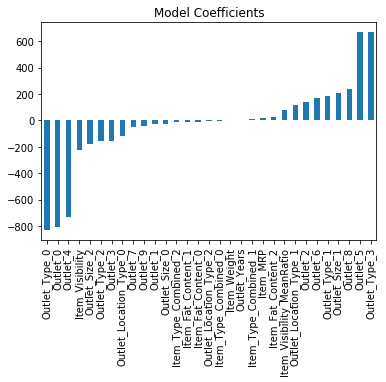

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
%matplotlib inline
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

Public LB Score: 1203

Though the regression coefficient look better now, the score is about the same. You can tune the parameters of the model for slightly better results but I don’t think there will be a significant improvement. Even the cross-validation score is same so we can’t expect way better performance.

Decision Tree Model

Lets try out a decision tree model and see if we get something better.

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


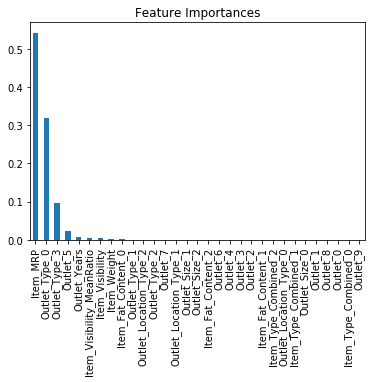

In [135]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

Public LB Score: 1162

Here you can see that the RMSE is 1058 and the mean CV error is 1091. This tells us that the model is slightly overfitting. Lets try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


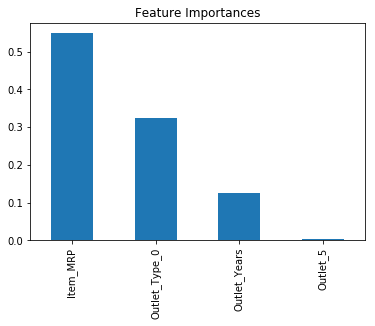

In [136]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

Public LB Score: 1157

You can fine tune the model further using other parameters. I’ll leave this to you.

Random Forest Model

Lets try a random forest model as well and see if we get some improvements. Read more about random forest here.

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 44.06 | Min - 1020 | Max - 1162


/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


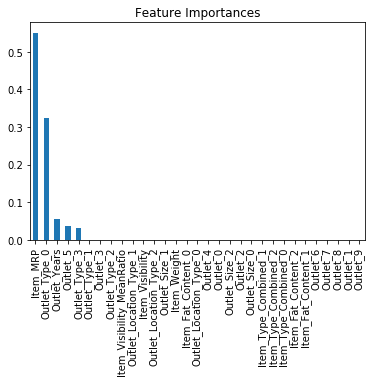

In [137]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

Public LB Score: 1154

You might feel this is a very small improvement but as our model gets better, achieving even minute improvements becomes exponentially difficult. Lets try another random forest with max_depth of 6 and 400 trees. Increasing the number of trees makes the model robust but is computationally expensive.

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/sklearn/metrics


Model Report
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.83 | Min - 1020 | Max - 1161


/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/IntroToTensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


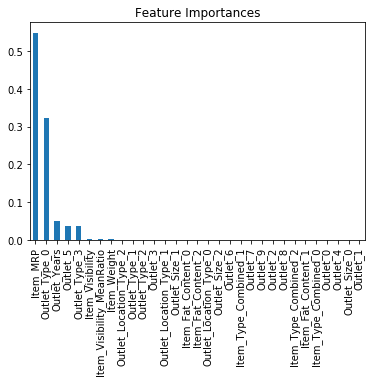

In [138]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

LB Score: 1152

Again this is an incremental change but will help you get a jump of 5-10 ranks on leaderboard. You should try to tune the parameters further to get higher accuracy. But this is good enough to get you into the top 20 on the LB as of now. I tried a basic GBM with little tuning and got into the top 10. I leave it to you to refine with score with better algorithms like GBM and XGBoost and try ensemble techniques.

### End Notes

This article took us through the entire journey of solving a data science problem. We started with making some hypothesis about the data without looking at it. Then we moved on to data exploration where we found out some nuances in the data which required remediation. Next, we performed data cleaning and feature engineering, where we imputed missing values and solved other irregularities, made new features and also made the data model-friendly by one-hot-coding. Finally we made regression, decision tree and random forest model and got a glimpse of how to tune them for better results.

I believe everyone reading this article should attain a good score in BigMart Sales now. For beginners, you should achieve at least a score of 1150 and for the ones already on the top, you can use some feature engineering tips from here to go further up. All the best to all!